In [1]:
import pandas as pd
%pylab inline


from sklearn.ensemble import RandomForestRegressor


import seaborn as sns



Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv("RedditShortDemoSurvey-1-Cleaned.csv")

In [3]:
df

,Entry Id,Please indicate your gender.,Please select the category that includes your age.,What is your marital status?,What best describes your employment status?,Are you or have you ever been in military service?,Do you currently have children under the age of 18 living in your household?,What best describes your level of education?,Treated country data,(For U. S. redditors) In which state do you live?,Which one of the following ranges includes your total yearly household income before taxes?,treated subreddit data,Are you a dog or a cat person?,"If you were a cheese, what cheese would you be?",Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,1,Male,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,New York,"$150,000 or more",getmotivated,none,none,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Male,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,New York,"$150,000 or more",gaming,none,none,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Female,18-24,Blank,Freelance,none,No,Some college,United States,Virginia,"Under $20,000",snackexchange,none,none,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Male,25-34,Blank,Freelance,none,No,Bachelor's degree,United States,New York,"$150,000 or more",spacedicks,none,none,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Female,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,California,"$70,000 - $99,999",aww,none,none,NaN,NaN,NaN,NaN,NaN,NaN
5,6,Male,25-34,Married/civil union/domestic partnership,Employed full time,No,No,Bachelor's degree,United States,New York,"$150,000 or more",gaming,I like dogs.,Cheddar,NaN,NaN,NaN,NaN,NaN,NaN
6,7,Male,25-34,In a relationship,Employed full time,No,No,Some college,Germany,NaN,none,python,I like dogs.,Cheddar,NaN,NaN,NaN,NaN,NaN,NaN
7,8,Male,18-24,Married/civil union/domestic partnership,"Not employed, but looking for work",No,No,Bachelor's degree,United States,California,"$70,000 - $99,999",fffffffuuuuuuuuuuuu,I like dogs.,American,NaN,NaN,NaN,NaN,NaN,NaN
8,9,Male,35-44,Married/civil union/domestic partnership,Employed full time,No,No,Bachelor's degree,United States,New York,"$150,000 or more",todayilearned,I like cats.,Provolone,NaN,NaN,NaN,NaN,NaN,NaN
9,10,Male,25-34,In a relationship,Freelance,No,No,Some college,Germany,NaN,"$70,000 - $99,999",NaN,I like cats.,Munster,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.columns

Index([u'Entry Id', u'Please indicate your gender.',
       u'Please select the category that includes your age.',
       u'What is your marital status?',
       u'What best describes your employment status?',
       u'Are you or have you ever been in military service?',
       u'Do you currently have children under the age of 18 living in your household?',
       u'What best describes your level of education?',
       u'Treated country data',
       u'(For U. S. redditors) In which state do you live?',
       u'Which one of the following ranges includes your total yearly household income before taxes?',
       u'treated subreddit data', u'Are you a dog or a cat person?',
       u'If you were a cheese, what cheese would you be?', u'Unnamed: 14',
       u'Unnamed: 15', u'Unnamed: 16', u'Unnamed: 17', u'Unnamed: 18',
       u'Unnamed: 19'],
      dtype='object')

In [5]:
#The columns Unnamed: 14 Unnamed: 15', u'Unnamed: 16', u'Unnamed: 17', u'Unnamed: 18', u'Unnamed: 19' looks useless . Hence, dropping them.
del df['Unnamed: 14']
del df['Unnamed: 15']
del df['Unnamed: 16']
del df['Unnamed: 17']
del df['Unnamed: 18']
del df['Unnamed: 19']


In [6]:
#Remaning the features for convienice.
df = df.rename(columns = { 
    'Entry Id' : 'EntryId',
    'Please indicate your gender.': 'Gender',
     'Please select the category that includes your age.':'Age',   
    'What is your marital status?':'Mari_Status',
    'What best describes your employment status?':'Emp_Status',
    'Are you or have you ever been in military service?':'Military_Service',
    'Do you currently have children under the age of 18 living in your household?': 'Children_Under18',
    'What best describes your level of education?':'Education',
    'Treated country data':'Country',
    '(For U. S. redditors) In which state do you live?':'State',
    'Which one of the following ranges includes your total yearly household income before taxes?':'IncomeBeforeTaxes',
    'treated subreddit data':'Subreddit',
    'Are you a dog or a cat person?':'like_CatsOrDogs',
    'If you were a cheese, what cheese would you be?':'Cheese_You'})

In [7]:
df.columns

Index([u'EntryId', u'Gender', u'Age', u'Mari_Status', u'Emp_Status',
       u'Military_Service', u'Children_Under18', u'Education', u'Country',
       u'State', u'IncomeBeforeTaxes', u'Subreddit', u'like_CatsOrDogs',
       u'Cheese_You'],
      dtype='object')

# EDA

In [8]:
#EntryId

In [9]:
df.EntryId.value_counts()

2047     1
15693    1
21824    1
23873    1
17730    1
19779    1
30020    1
32069    1
25926    1
27975    1
5448     1
7497     1
1354     1
3403     1
13644    1
9550     1
9518     1
11599    1
21856    1
23905    1
17762    1
19811    1
30052    1
32101    1
25958    1
28007    1
5480     1
7529     1
1386     1
3435     1
        ..
17085    1
19132    1
8849     1
14994    1
12947    1
2708     1
661      1
6806     1
4759     1
27288    1
25241    1
31386    1
29339    1
19100    1
17053    1
23198    1
21151    1
10928    1
8881     1
15026    1
12979    1
2740     1
693      1
6838     1
4791     1
27320    1
25273    1
31418    1
29371    1
2049     1
Name: EntryId, dtype: int64

In [10]:
#I don't think feature EntryId is needed. Hence, dropping.
del df['EntryId']

In [11]:
df.columns

Index([u'Gender', u'Age', u'Mari_Status', u'Emp_Status', u'Military_Service',
       u'Children_Under18', u'Education', u'Country', u'State',
       u'IncomeBeforeTaxes', u'Subreddit', u'like_CatsOrDogs', u'Cheese_You'],
      dtype='object')

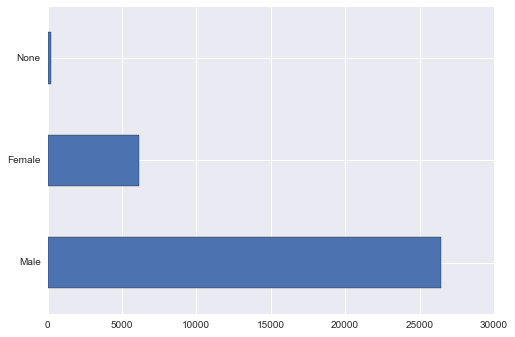

In [12]:
#Gender
df.Gender.value_counts().plot('barh')

In [13]:
df.Gender.value_counts()

Male      26418
Female     6135
None        201
Name: Gender, dtype: int64

In [14]:
#Gender is a Categorical variable
df[df.Gender.isnull()]

,Gender,Age,Mari_Status,Emp_Status,Military_Service,Children_Under18,Education,Country,State,IncomeBeforeTaxes,Subreddit,like_CatsOrDogs,Cheese_You


In [15]:
#Age
df.Age.value_counts()

18-24          15802
25-34          11575
Under 18        2330
35-44           2257
45-54            502
55-64            140
None              88
65 or Above       60
Name: Age, dtype: int64

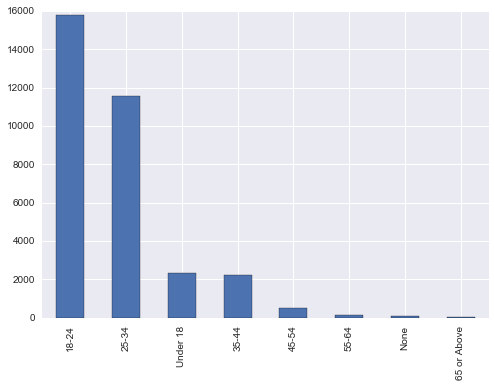

In [16]:
#Age is categorical
df.Age.value_counts().plot(kind='bar')

In [17]:
df[df.Age.isnull()]

,Gender,Age,Mari_Status,Emp_Status,Military_Service,Children_Under18,Education,Country,State,IncomeBeforeTaxes,Subreddit,like_CatsOrDogs,Cheese_You


In [18]:
#No missing values

In [19]:
#Marital Status
df.Mari_Status.value_counts()

Single                                      10428
In a relationship                            9828
Forever Alone                                5850
Married/civil union/domestic partnership     5490
Engaged                                      1109
Widowed                                        44
Blank                                           5
Name: Mari_Status, dtype: int64

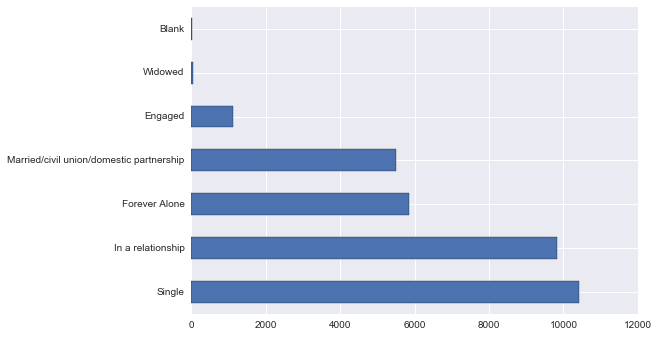

In [20]:
df.Mari_Status.value_counts().plot('barh')

In [21]:
df[df.Mari_Status.isnull()]

,Gender,Age,Mari_Status,Emp_Status,Military_Service,Children_Under18,Education,Country,State,IncomeBeforeTaxes,Subreddit,like_CatsOrDogs,Cheese_You


In [22]:
#No missing values. And it is categorical. 

In [23]:
#Emp_Staus
df.Emp_Status.value_counts()

Employed full time                       14814
Student                                  12987
Not employed, but looking for work        2087
Freelance                                 1948
Not employed and not looking for work      682
None                                       151
Retired                                     85
Name: Emp_Status, dtype: int64

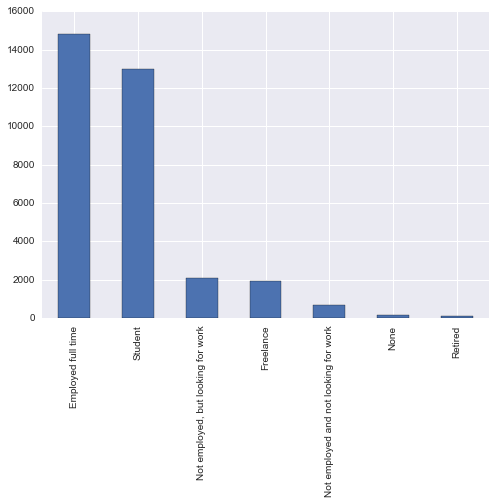

In [24]:
df.Emp_Status.value_counts().plot('bar')

In [25]:
#Categorical too. let's see if it has null values
df[df.Emp_Status.isnull()]

,Gender,Age,Mari_Status,Emp_Status,Military_Service,Children_Under18,Education,Country,State,IncomeBeforeTaxes,Subreddit,like_CatsOrDogs,Cheese_You


In [26]:
#Nope. No null values. 

In [27]:
df.columns

Index([u'Gender', u'Age', u'Mari_Status', u'Emp_Status', u'Military_Service',
       u'Children_Under18', u'Education', u'Country', u'State',
       u'IncomeBeforeTaxes', u'Subreddit', u'like_CatsOrDogs', u'Cheese_You'],
      dtype='object')

In [28]:
df.Military_Service.value_counts()

No      30526
Yes      2223
none        5
Name: Military_Service, dtype: int64

In [29]:
#Categorical. Lets find missing values
df[df.Military_Service.isnull()]

,Gender,Age,Mari_Status,Emp_Status,Military_Service,Children_Under18,Education,Country,State,IncomeBeforeTaxes,Subreddit,like_CatsOrDogs,Cheese_You


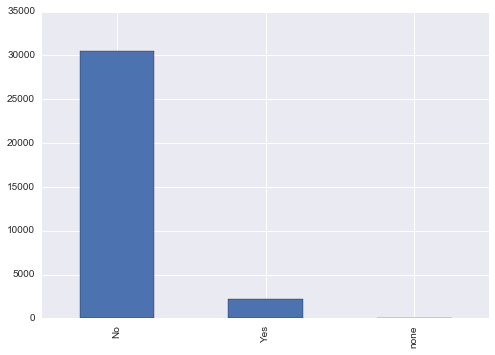

In [30]:
df.Military_Service.value_counts().plot('bar')

In [31]:
#Children_Under18
df.Children_Under18.value_counts()

No      27488
Yes      5047
None      219
Name: Children_Under18, dtype: int64

In [32]:
#Categorical. Missing values? 
df[df.Children_Under18.isnull()]

,Gender,Age,Mari_Status,Emp_Status,Military_Service,Children_Under18,Education,Country,State,IncomeBeforeTaxes,Subreddit,like_CatsOrDogs,Cheese_You


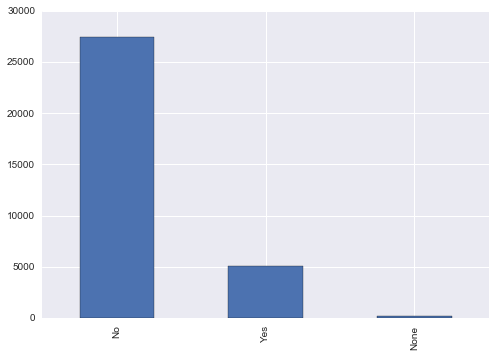

In [33]:
df.Children_Under18.value_counts().plot('bar')

In [34]:
#Education
df.Education.value_counts()

Bachelor's degree                     11046
Some college                           9600
Graduate or professional degree        4722
High school graduate or equivalent     3272
Some high school                       1924
Associate degree                       1411
Trade or Vocational degree              635
None                                    144
Name: Education, dtype: int64

In [35]:
#Categorical. Missing values?
df[df.Education.isnull()]

,Gender,Age,Mari_Status,Emp_Status,Military_Service,Children_Under18,Education,Country,State,IncomeBeforeTaxes,Subreddit,like_CatsOrDogs,Cheese_You


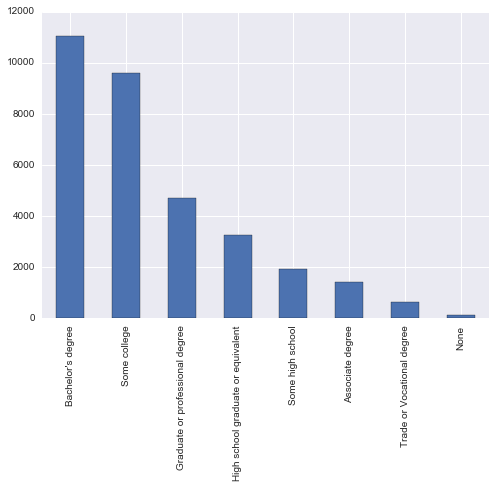

In [36]:
df.Education.value_counts().plot('bar')

In [37]:
#Country
df.Country.value_counts()

United States                       20967
Canada                               2888
United Kingdom                       1782
Australia                            1051
Germany                               407
New Zealand                           315
Sweden                                309
Norway                                288
Ireland                               242
Finland                               188
Denmark                               182
none                                  177
India                                 154
France                                142
The Netherlands                       141
Netherlands                           134
Belgium                               119
Poland                                112
Brazil                                111
Mexico                                108
Spain                                 100
canada                                 97
Portugal                               87
Switzerland                       

In [38]:
df[df.Country.isnull()]

,Gender,Age,Mari_Status,Emp_Status,Military_Service,Children_Under18,Education,Country,State,IncomeBeforeTaxes,Subreddit,like_CatsOrDogs,Cheese_You


In [39]:
#State in which you live
df.State.value_counts()

California        3401
Texas             1541
New York          1418
Illinois           976
Washington         910
Florida            882
Pennsylvania       823
Massachusetts      796
Virginia           729
Ohio               654
New Jersey         552
Michigan           545
North Carolina     511
Maryland           508
Georgia            501
Oregon             466
Minnesota          464
Wisconsin          415
Colorado           410
Arizona            364
Missouri           340
Indiana            313
Connecticut        303
Tennessee          292
Louisiana          196
Utah               181
Kansas             174
Iowa               170
South Carolina     169
Kentucky           168
Alabama            166
Oklahoma           150
Nebraska           118
New Hampshire      111
Nevada             110
Arkansas            99
Washington, DC      98
Maine               85
New Mexico          83
Idaho               78
Alaska              75
Vermont             74
Rhode Island        72
Hawaii     

In [40]:
df[df.State.isnull()]

,Gender,Age,Mari_Status,Emp_Status,Military_Service,Children_Under18,Education,Country,State,IncomeBeforeTaxes,Subreddit,like_CatsOrDogs,Cheese_You
6,Male,25-34,In a relationship,Employed full time,No,No,Some college,Germany,NaN,none,python,I like dogs.,Cheddar
9,Male,25-34,In a relationship,Freelance,No,No,Some college,Germany,NaN,"$70,000 - $99,999",NaN,I like cats.,Munster
13,Male,18-24,Forever Alone,Student,No,No,Some college,Romania,NaN,"Under $20,000",NaN,I like cats.,Swiss
17,Male,35-44,Single,Not employed and not looking for work,No,No,Graduate or professional degree,United Kingdom,NaN,"Under $20,000",aww,I like cats.,Goat
18,Male,25-34,Single,Employed full time,No,No,Graduate or professional degree,Republic of Ireland,NaN,"$40,000 - $49,999",askscience,I like cats.,Feta
20,Male,45-54,Married/civil union/domestic partnership,Freelance,No,Yes,High school graduate or equivalent,France,NaN,"Under $20,000",motorcycles,I like dogs.,Cheddar
21,Male,Under 18,Forever Alone,Student,No,Yes,High school graduate or equivalent,United Kingdom,NaN,"$100,000 - $149,999",anarchism,I like turtles.,Swiss
22,Male,18-24,Single,Employed full time,No,No,High school graduate or equivalent,Germany,NaN,"$100,000 - $149,999",truereddit,I like cats.,Other
23,Male,55-64,Forever Alone,Employed full time,Yes,No,Trade or Vocational degree,Canada,NaN,"$40,000 - $49,999",atheism,I like cats.,Feta
24,Male,45-54,Married/civil union/domestic partnership,Freelance,No,No,Some college,Germany,NaN,"$150,000 or more",new,I like turtles.,Other


In [41]:
#We are anyhow going to drop this feature . Hence, not handling 
#missing values. 
del df['State']

In [42]:
#IncomeBeforeTaxes
df.IncomeBeforeTaxes.value_counts()

Under $20,000          7892
$50,000 - $69,999      4133
$70,000 - $99,999      4101
$100,000 - $149,999    3522
$20,000 - $29,999      3206
$30,000 - $39,999      2904
$150,000 or more       2695
$40,000 - $49,999      2686
none                   1615
Name: IncomeBeforeTaxes, dtype: int64

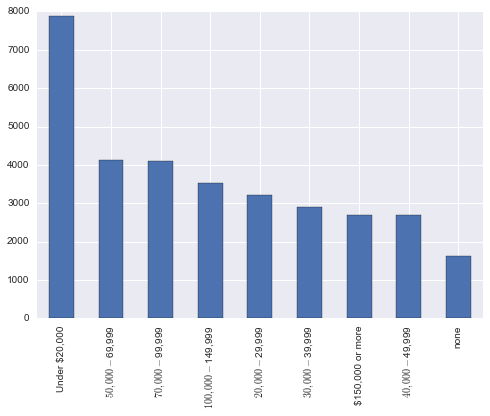

In [43]:
df.IncomeBeforeTaxes.value_counts().plot('bar')

In [44]:
df[df.IncomeBeforeTaxes.isnull()]

,Gender,Age,Mari_Status,Emp_Status,Military_Service,Children_Under18,Education,Country,IncomeBeforeTaxes,Subreddit,like_CatsOrDogs,Cheese_You


In [45]:
#Subreddit
df.Subreddit.value_counts()

askreddit                                        2123
fffffffuuuuuuuuuuuu                              1746
pics                                             1651
trees                                            1311
gaming                                           1207
funny                                            1092
atheism                                           839
askscience                                        779
all                                               647
todayilearned                                     645
starcraft                                         611
iama                                              576
minecraft                                         520
f7u12                                             515
programming                                       501
twoxchromosomes                                   396
science                                           378
truereddit                                        347
wtf                         

In [46]:
df[df.Subreddit.isnull()]

,Gender,Age,Mari_Status,Emp_Status,Military_Service,Children_Under18,Education,Country,IncomeBeforeTaxes,Subreddit,like_CatsOrDogs,Cheese_You
9,Male,25-34,In a relationship,Freelance,No,No,Some college,Germany,"$70,000 - $99,999",NaN,I like cats.,Munster
13,Male,18-24,Forever Alone,Student,No,No,Some college,Romania,"Under $20,000",NaN,I like cats.,Swiss
29,Female,18-24,Forever Alone,Student,No,No,Some college,United States,none,NaN,I like dogs.,American
52,Male,25-34,Single,"Not employed, but looking for work",No,No,Bachelor's degree,United States,"$70,000 - $99,999",NaN,I like cats.,Provolone
61,Male,25-34,Single,Employed full time,Yes,No,Some college,romania,"$20,000 - $29,999",NaN,I like cats.,Other
75,Male,35-44,Single,Freelance,No,No,Some college,United Kingdom,"$70,000 - $99,999",NaN,I like cats.,Other
79,Male,25-34,Single,Employed full time,No,No,Bachelor's degree,United States,"$40,000 - $49,999",NaN,I like cats.,Brie
89,Male,18-24,Single,Student,No,No,Some college,United States,"$150,000 or more",NaN,I like cats.,Brie
103,Male,25-34,In a relationship,Student,No,No,Bachelor's degree,United States,"$20,000 - $29,999",NaN,I like dogs.,Goat
162,Female,25-34,Single,Student,No,No,Bachelor's degree,United States,"Under $20,000",NaN,I like turtles.,Goat


In [47]:
#Handling missing values
df['Subreddit'].fillna('none',inplace=True)

In [48]:
df[df.Subreddit.isnull()]

,Gender,Age,Mari_Status,Emp_Status,Military_Service,Children_Under18,Education,Country,IncomeBeforeTaxes,Subreddit,like_CatsOrDogs,Cheese_You


In [49]:
#like_CatsOrDogs
df.like_CatsOrDogs.value_counts()

I like dogs.       17149
I like cats.       11152
I like turtles.     4442
none                   5
askreddit              2
 Reddit.com            1
movies                 1
Name: like_CatsOrDogs, dtype: int64

In [50]:
df[df.like_CatsOrDogs.isnull()]

,Gender,Age,Mari_Status,Emp_Status,Military_Service,Children_Under18,Education,Country,IncomeBeforeTaxes,Subreddit,like_CatsOrDogs,Cheese_You
2705,Male,18-24,Single,"Not employed, but looking for work",No,No,Bachelor's degree,United Kingdom,none,DROP TABLE `users`,NaN,1
30331,Male,25-34,In a relationship,Employed full time,No,No,Bachelor's degree,Canada,"$70,000 - $99,999",DROP TABLE USERS,NaN,programming')


In [51]:
#Handling missing values
df['like_CatsOrDogs'].fillna('none',inplace=True)

In [52]:
df[df.like_CatsOrDogs.isnull()]

,Gender,Age,Mari_Status,Emp_Status,Military_Service,Children_Under18,Education,Country,IncomeBeforeTaxes,Subreddit,like_CatsOrDogs,Cheese_You


In [53]:
#Removing 'askreddit', 'movies' and 'Reddit.com'
df.loc[df['like_CatsOrDogs'] == 'movies','like_CatsOrDogs'] = 'none'

In [54]:
df.loc[df['like_CatsOrDogs'] == 'askreddit','like_CatsOrDogs'] = 'none'

In [55]:
df.loc[df['like_CatsOrDogs'] == ' Reddit.com','like_CatsOrDogs'] = 'none'

In [56]:
df.loc[df['like_CatsOrDogs'] == 'I like turtles.','like_CatsOrDogs'] = 'none'

In [57]:
df.like_CatsOrDogs.value_counts()

I like dogs.    17149
I like cats.    11152
none             4453
Name: like_CatsOrDogs, dtype: int64

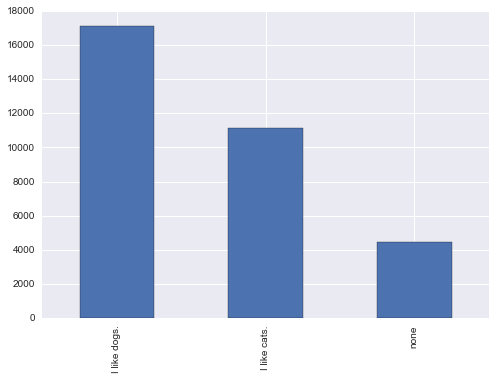

In [58]:
df.like_CatsOrDogs.value_counts().plot('bar')

In [59]:
#Cheese_You
df.Cheese_You.value_counts()

Other            6562
Cheddar          6101
Brie             3742
Provolone        3454
Swiss            3214
Feta             2991
Goat             2516
Munster          1770
American         1438
Paneer            618
Limburger         337
none                5
 f7u12              2
1                   1
programming')       1
 awww               1
 Pics               1
Name: Cheese_You, dtype: int64

In [60]:
df[df.Cheese_You.isnull()]

,Gender,Age,Mari_Status,Emp_Status,Military_Service,Children_Under18,Education,Country,IncomeBeforeTaxes,Subreddit,like_CatsOrDogs,Cheese_You


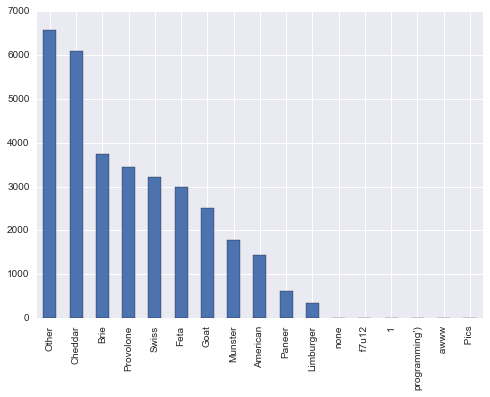

In [61]:
df.Cheese_You.value_counts().plot('bar')

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32754 entries, 0 to 32753
Data columns (total 12 columns):
Gender               32754 non-null object
Age                  32754 non-null object
Mari_Status          32754 non-null object
Emp_Status           32754 non-null object
Military_Service     32754 non-null object
Children_Under18     32754 non-null object
Education            32754 non-null object
Country              32754 non-null object
IncomeBeforeTaxes    32754 non-null object
Subreddit            32754 non-null object
like_CatsOrDogs      32754 non-null object
Cheese_You           32754 non-null object
dtypes: object(12)
memory usage: 3.0+ MB


## Aggregate all Countries to their Continents

In [63]:
SOUTH_AMERICA = [
'Argentina',
'Bolivia',
'Brazil',
'Chile',
'Colombia',
'Ecuador',
'Guyana',
'Paraguay',
'Peru',
'Suriname',
'Uruguay',
'Venezuela']


OCEANIA = [
'Australia',
'Fiji',
'Kiribati',
'Marshall Islands',
'Micronesia',
'Nauru',
'New Zealand',
'Palau',
'Papua New Guinea',
'Samoa',
'Solomon Islands',
'Tonga',
'Tuvalu',
'Vanuatu']

NORTH_AMERICA= [
'Antigua and Barbuda',
'Bahamas',
'Barbados',
'Belize',
'Canada',
'Costa Rica',
'Cuba',
'Dominica',
'Dominican Republic',
'El Salvador',
'Grenada',
'Guatemala',
'Haiti',
'Honduras',
'Jamaica',
'Mexico',
'Nicaragua',
'Panama',
'Saint Kitts and Nevis',
'Saint Lucia',
'Saint Vincent and the Grenadines',
'Trinidad and Tobago',
'United States']

EUROPE=[
'Albania',
'Andorra',
'Armenia',
'Austria',
'Azerbaijan',
'Belarus',
'Belgium',
'Bosnia and Herzegovina',
'Bulgaria',
'Croatia',
'Cyprus',
'Czech Republic',
'Denmark',
'Estonia',
'Finland',
'France',
'Georgia',
'Germany',
'Greece',
'Hungary',
'Iceland',
'Ireland',
'Italy',
'Latvia',
'Liechtenstein',
'Lithuania',
'Luxembourg',
'Macedonia',
'Malta',
'Moldova',
'Monaco',
'Montenegro',
'Netherlands',
'Norway',
'Poland',
'Portugal',
'Romania',
'San Marino',
'Serbia',
'Slovakia',
'Slovenia',
'Spain',
'Sweden',
'Switzerland',
'Ukraine',
'United Kingdom',
'Vatican City']


ASIA=[
'Afghanistan',
'Bahrain',
'Bangladesh',
'Bhutan',
'Brunei',
'Burma (Myanmar)',
'Cambodia',
'China',
'East Timor',
'India',
'Indonesia',
'Iran',
'Iraq',
'Israel',
'Japan',
'Jordan',
'Kazakhstan',
'Korea, North',
'Korea, South',
'Kuwait',
'Kyrgyzstan',
'Laos',
'Lebanon',
'Malaysia',
'Maldives',
'Mongolia',
'Nepal',
'Oman'
'Pakistan',
'Philippines',
'Qatar',
'Russian Federation',
'Saudi Arabia',
'Singapore',
'Sri Lanka',
'Syria',
'Tajikistan',
'Thailand',
'Turkey',
'Turkmenistan',
'United Arab Emirates',
'Uzbekistan',
'Vietnam',
'Yemen']

AFRICA=[
'Algeria',
'Angola',
'Benin',
'Botswana',
'Burkina',
'Burundi',
'Cameroon',
'Cape Verde',
'Central African Republic',
'Chad',
'Comoros',
'Congo',
'Congo, Democratic Republic of',
'Djibouti',
'Egypt',
'Equatorial Guinea',
'Eritrea',
'Ethiopia',
'Gabon',
'Gambia',
'Ghana',
'Guinea',
'Guinea-Bissau',
'Ivory Coast',
'Kenya',
'Lesotho',
'Liberia',
'Libya',
'Madagascar',
'Malawi',
'Mali',
'Mauritania',
'Mauritius',
'Morocco',
'Mozambique',
'Namibia',
'Niger',
'Nigeria',
'Rwanda',
'Sao Tome and Principe',
'Senegal',
'Seychelles',
'Sierra Leone',
'Somalia',
'South Africa',
'South Sudan',
'Sudan',
'Swaziland',
'Tanzania',
'Togo',
'Tunisia',
'Uganda',
'Zambia',
'Zimbabwe']




In [64]:
[x.upper() for x in SOUTH_AMERICA]

['ARGENTINA',
 'BOLIVIA',
 'BRAZIL',
 'CHILE',
 'COLOMBIA',
 'ECUADOR',
 'GUYANA',
 'PARAGUAY',
 'PERU',
 'SURINAME',
 'URUGUAY',
 'VENEZUELA']

In [65]:
[x.upper() for x in NORTH_AMERICA]

['ANTIGUA AND BARBUDA',
 'BAHAMAS',
 'BARBADOS',
 'BELIZE',
 'CANADA',
 'COSTA RICA',
 'CUBA',
 'DOMINICA',
 'DOMINICAN REPUBLIC',
 'EL SALVADOR',
 'GRENADA',
 'GUATEMALA',
 'HAITI',
 'HONDURAS',
 'JAMAICA',
 'MEXICO',
 'NICARAGUA',
 'PANAMA',
 'SAINT KITTS AND NEVIS',
 'SAINT LUCIA',
 'SAINT VINCENT AND THE GRENADINES',
 'TRINIDAD AND TOBAGO',
 'UNITED STATES']

In [66]:
[x.upper() for x in AFRICA]

['ALGERIA',
 'ANGOLA',
 'BENIN',
 'BOTSWANA',
 'BURKINA',
 'BURUNDI',
 'CAMEROON',
 'CAPE VERDE',
 'CENTRAL AFRICAN REPUBLIC',
 'CHAD',
 'COMOROS',
 'CONGO',
 'CONGO, DEMOCRATIC REPUBLIC OF',
 'DJIBOUTI',
 'EGYPT',
 'EQUATORIAL GUINEA',
 'ERITREA',
 'ETHIOPIA',
 'GABON',
 'GAMBIA',
 'GHANA',
 'GUINEA',
 'GUINEA-BISSAU',
 'IVORY COAST',
 'KENYA',
 'LESOTHO',
 'LIBERIA',
 'LIBYA',
 'MADAGASCAR',
 'MALAWI',
 'MALI',
 'MAURITANIA',
 'MAURITIUS',
 'MOROCCO',
 'MOZAMBIQUE',
 'NAMIBIA',
 'NIGER',
 'NIGERIA',
 'RWANDA',
 'SAO TOME AND PRINCIPE',
 'SENEGAL',
 'SEYCHELLES',
 'SIERRA LEONE',
 'SOMALIA',
 'SOUTH AFRICA',
 'SOUTH SUDAN',
 'SUDAN',
 'SWAZILAND',
 'TANZANIA',
 'TOGO',
 'TUNISIA',
 'UGANDA',
 'ZAMBIA',
 'ZIMBABWE']

In [67]:
[x.upper() for x in EUROPE]

['ALBANIA',
 'ANDORRA',
 'ARMENIA',
 'AUSTRIA',
 'AZERBAIJAN',
 'BELARUS',
 'BELGIUM',
 'BOSNIA AND HERZEGOVINA',
 'BULGARIA',
 'CROATIA',
 'CYPRUS',
 'CZECH REPUBLIC',
 'DENMARK',
 'ESTONIA',
 'FINLAND',
 'FRANCE',
 'GEORGIA',
 'GERMANY',
 'GREECE',
 'HUNGARY',
 'ICELAND',
 'IRELAND',
 'ITALY',
 'LATVIA',
 'LIECHTENSTEIN',
 'LITHUANIA',
 'LUXEMBOURG',
 'MACEDONIA',
 'MALTA',
 'MOLDOVA',
 'MONACO',
 'MONTENEGRO',
 'NETHERLANDS',
 'NORWAY',
 'POLAND',
 'PORTUGAL',
 'ROMANIA',
 'SAN MARINO',
 'SERBIA',
 'SLOVAKIA',
 'SLOVENIA',
 'SPAIN',
 'SWEDEN',
 'SWITZERLAND',
 'UKRAINE',
 'UNITED KINGDOM',
 'VATICAN CITY']

In [68]:
[x.upper() for x in ASIA]

['AFGHANISTAN',
 'BAHRAIN',
 'BANGLADESH',
 'BHUTAN',
 'BRUNEI',
 'BURMA (MYANMAR)',
 'CAMBODIA',
 'CHINA',
 'EAST TIMOR',
 'INDIA',
 'INDONESIA',
 'IRAN',
 'IRAQ',
 'ISRAEL',
 'JAPAN',
 'JORDAN',
 'KAZAKHSTAN',
 'KOREA, NORTH',
 'KOREA, SOUTH',
 'KUWAIT',
 'KYRGYZSTAN',
 'LAOS',
 'LEBANON',
 'MALAYSIA',
 'MALDIVES',
 'MONGOLIA',
 'NEPAL',
 'OMANPAKISTAN',
 'PHILIPPINES',
 'QATAR',
 'RUSSIAN FEDERATION',
 'SAUDI ARABIA',
 'SINGAPORE',
 'SRI LANKA',
 'SYRIA',
 'TAJIKISTAN',
 'THAILAND',
 'TURKEY',
 'TURKMENISTAN',
 'UNITED ARAB EMIRATES',
 'UZBEKISTAN',
 'VIETNAM',
 'YEMEN']

In [69]:
[x.upper() for x in OCEANIA]

['AUSTRALIA',
 'FIJI',
 'KIRIBATI',
 'MARSHALL ISLANDS',
 'MICRONESIA',
 'NAURU',
 'NEW ZEALAND',
 'PALAU',
 'PAPUA NEW GUINEA',
 'SAMOA',
 'SOLOMON ISLANDS',
 'TONGA',
 'TUVALU',
 'VANUATU']

In [70]:
SOUTH_AMERICA =['ARGENTINA',
 'BOLIVIA',
 'BRAZIL',
 'CHILE',
 'COLOMBIA',
 'ECUADOR',
 'GUYANA',
 'PARAGUAY',
 'PERU',
 'SURINAME',
 'URUGUAY',
 'VENEZUELA']


NORTH_AMERICA=['ANTIGUA AND BARBUDA',
 'BAHAMAS',
 'BARBADOS',
 'BELIZE',
 'CANADA',
 'COSTA RICA',
 'CUBA',
 'DOMINICA',
 'DOMINICAN REPUBLIC',
 'EL SALVADOR',
 'GRENADA',
 'GUATEMALA',
 'HAITI',
 'HONDURAS',
 'JAMAICA',
 'MEXICO',
 'NICARAGUA',
 'PANAMA',
 'SAINT KITTS AND NEVIS',
 'SAINT LUCIA',
 'SAINT VINCENT AND THE GRENADINES',
 'TRINIDAD AND TOBAGO',
 'UNITED STATES']


AFRICA=['ALGERIA',
 'ANGOLA',
 'BENIN',
 'BOTSWANA',
 'BURKINA',
 'BURUNDI',
 'CAMEROON',
 'CAPE VERDE',
 'CENTRAL AFRICAN REPUBLIC',
 'CHAD',
 'COMOROS',
 'CONGO',
 'CONGO, DEMOCRATIC REPUBLIC OF',
 'DJIBOUTI',
 'EGYPT',
 'EQUATORIAL GUINEA',
 'ERITREA',
 'ETHIOPIA',
 'GABON',
 'GAMBIA',
 'GHANA',
 'GUINEA',
 'GUINEA-BISSAU',
 'IVORY COAST',
 'KENYA',
 'LESOTHO',
 'LIBERIA',
 'LIBYA',
 'MADAGASCAR',
 'MALAWI',
 'MALI',
 'MAURITANIA',
 'MAURITIUS',
 'MOROCCO',
 'MOZAMBIQUE',
 'NAMIBIA',
 'NIGER',
 'NIGERIA',
 'RWANDA',
 'SAO TOME AND PRINCIPE',
 'SENEGAL',
 'SEYCHELLES',
 'SIERRA LEONE',
 'SOMALIA',
 'SOUTH AFRICA',
 'SOUTH SUDAN',
 'SUDAN',
 'SWAZILAND',
 'TANZANIA',
 'TOGO',
 'TUNISIA',
 'UGANDA',
 'ZAMBIA',
 'ZIMBABWE']


EUROPE=['ALBANIA',
 'ANDORRA',
 'ARMENIA',
 'AUSTRIA',
 'AZERBAIJAN',
 'BELARUS',
 'BELGIUM',
 'BOSNIA AND HERZEGOVINA',
 'BULGARIA',
 'CROATIA',
 'CYPRUS',
 'CZECH REPUBLIC',
 'DENMARK',
 'ESTONIA',
 'FINLAND',
 'FRANCE',
 'GEORGIA',
 'GERMANY',
 'GREECE',
 'HUNGARY',
 'ICELAND',
 'IRELAND',
 'ITALY',
 'LATVIA',
 'LIECHTENSTEIN',
 'LITHUANIA',
 'LUXEMBOURG',
 'MACEDONIA',
 'MALTA',
 'MOLDOVA',
 'MONACO',
 'MONTENEGRO',
 'NETHERLANDS',
 'NORWAY',
 'POLAND',
 'PORTUGAL',
 'ROMANIA',
 'SAN MARINO',
 'SERBIA',
 'SLOVAKIA',
 'SLOVENIA',
 'SPAIN',
 'SWEDEN',
 'SWITZERLAND',
 'UKRAINE',
 'UNITED KINGDOM',
 'VATICAN CITY']


ASIA=['AFGHANISTAN',
 'BAHRAIN',
 'BANGLADESH',
 'BHUTAN',
 'BRUNEI',
 'BURMA (MYANMAR)',
 'CAMBODIA',
 'CHINA',
 'EAST TIMOR',
 'INDIA',
 'INDONESIA',
 'IRAN',
 'IRAQ',
 'ISRAEL',
 'JAPAN',
 'JORDAN',
 'KAZAKHSTAN',
 'KOREA, NORTH',
 'KOREA, SOUTH',
 'KUWAIT',
 'KYRGYZSTAN',
 'LAOS',
 'LEBANON',
 'MALAYSIA',
 'MALDIVES',
 'MONGOLIA',
 'NEPAL',
 'OMANPAKISTAN',
 'PHILIPPINES',
 'QATAR',
 'RUSSIAN FEDERATION',
 'SAUDI ARABIA',
 'SINGAPORE',
 'SRI LANKA',
 'SYRIA',
 'TAJIKISTAN',
 'THAILAND',
 'TURKEY',
 'TURKMENISTAN',
 'UNITED ARAB EMIRATES',
 'UZBEKISTAN',
 'VIETNAM',
 'YEMEN']


OCEANIA=['AUSTRALIA',
 'FIJI',
 'KIRIBATI',
 'MARSHALL ISLANDS',
 'MICRONESIA',
 'NAURU',
 'NEW ZEALAND',
 'PALAU',
 'PAPUA NEW GUINEA',
 'SAMOA',
 'SOLOMON ISLANDS',
 'TONGA',
 'TUVALU',
 'VANUATU']

In [71]:

df['Country'] = map(lambda x: x.upper(), df['Country'])

In [72]:
Continent = []
NoContinent=[]

for i in df['Country']:
    continent=''
    if(i in EUROPE):
        continent="Europe"
        Continent.append(continent)
    elif(i in NORTH_AMERICA ):
        continent="North America"
        Continent.append(continent)
    elif(i in SOUTH_AMERICA ):
        continent="South America"
        Continent.append(continent)
    elif(i in ASIA ):
        continent="Asia"
        Continent.append(continent)
        
    elif(i in AFRICA ):
        continent="Africa"
        Continent.append(continent)
        
    elif(i in OCEANIA ):
        continent="Oceania"
        Continent.append(continent)
    elif(i=='NONE' ):
        continent="NONE"
        Continent.append(continent)
        
    else:
        continent="Unknown"
        Continent.append(continent)
        NoContinent.append(i)

In [73]:
df['Continent']= Continent

In [74]:
df

,Gender,Age,Mari_Status,Emp_Status,Military_Service,Children_Under18,Education,Country,IncomeBeforeTaxes,Subreddit,like_CatsOrDogs,Cheese_You,Continent
0,Male,25-34,Blank,Employed full time,none,No,Bachelor's degree,UNITED STATES,"$150,000 or more",getmotivated,none,none,North America
1,Male,25-34,Blank,Employed full time,none,No,Bachelor's degree,UNITED STATES,"$150,000 or more",gaming,none,none,North America
2,Female,18-24,Blank,Freelance,none,No,Some college,UNITED STATES,"Under $20,000",snackexchange,none,none,North America
3,Male,25-34,Blank,Freelance,none,No,Bachelor's degree,UNITED STATES,"$150,000 or more",spacedicks,none,none,North America
4,Female,25-34,Blank,Employed full time,none,No,Bachelor's degree,UNITED STATES,"$70,000 - $99,999",aww,none,none,North America
5,Male,25-34,Married/civil union/domestic partnership,Employed full time,No,No,Bachelor's degree,UNITED STATES,"$150,000 or more",gaming,I like dogs.,Cheddar,North America
6,Male,25-34,In a relationship,Employed full time,No,No,Some college,GERMANY,none,python,I like dogs.,Cheddar,Europe
7,Male,18-24,Married/civil union/domestic partnership,"Not employed, but looking for work",No,No,Bachelor's degree,UNITED STATES,"$70,000 - $99,999",fffffffuuuuuuuuuuuu,I like dogs.,American,North America
8,Male,35-44,Married/civil union/domestic partnership,Employed full time,No,No,Bachelor's degree,UNITED STATES,"$150,000 or more",todayilearned,I like cats.,Provolone,North America
9,Male,25-34,In a relationship,Freelance,No,No,Some college,GERMANY,"$70,000 - $99,999",none,I like cats.,Munster,Europe


In [75]:
df[df['Continent']=='None']

df[df['Country']=="NONE"]

,Gender,Age,Mari_Status,Emp_Status,Military_Service,Children_Under18,Education,Country,IncomeBeforeTaxes,Subreddit,like_CatsOrDogs,Cheese_You,Continent
401,Female,18-24,In a relationship,Employed full time,No,No,Some college,NONE,"$20,000 - $29,999",none,I like cats.,Other,NONE
911,Male,18-24,In a relationship,Student,No,No,Some college,NONE,"$30,000 - $39,999",none,none,Goat,NONE
1045,Male,18-24,In a relationship,Student,No,Yes,Bachelor's degree,NONE,none,none,I like dogs.,Munster,NONE
1103,Male,Under 18,Single,Student,No,No,Some high school,NONE,none,none,I like dogs.,Munster,NONE
1187,Male,25-34,Single,Student,No,No,Bachelor's degree,NONE,"Under $20,000",truereddit,I like dogs.,Munster,NONE
1565,None,None,Forever Alone,None,Yes,None,None,NONE,"$70,000 - $99,999","tf2, ireland",I like dogs.,Goat,NONE
2164,Male,18-24,Forever Alone,Employed full time,No,No,High school graduate or equivalent,NONE,"$40,000 - $49,999",funny,I like cats.,Other,NONE
2337,Male,25-34,In a relationship,Employed full time,No,No,Some college,NONE,none,none,I like dogs.,Munster,NONE
3125,None,25-34,In a relationship,None,No,No,Bachelor's degree,NONE,"$70,000 - $99,999",none,I like dogs.,Cheddar,NONE
3350,Male,18-24,Single,Student,No,No,Bachelor's degree,NONE,"Under $20,000",none,none,Swiss,NONE


In [76]:
df

,Gender,Age,Mari_Status,Emp_Status,Military_Service,Children_Under18,Education,Country,IncomeBeforeTaxes,Subreddit,like_CatsOrDogs,Cheese_You,Continent
0,Male,25-34,Blank,Employed full time,none,No,Bachelor's degree,UNITED STATES,"$150,000 or more",getmotivated,none,none,North America
1,Male,25-34,Blank,Employed full time,none,No,Bachelor's degree,UNITED STATES,"$150,000 or more",gaming,none,none,North America
2,Female,18-24,Blank,Freelance,none,No,Some college,UNITED STATES,"Under $20,000",snackexchange,none,none,North America
3,Male,25-34,Blank,Freelance,none,No,Bachelor's degree,UNITED STATES,"$150,000 or more",spacedicks,none,none,North America
4,Female,25-34,Blank,Employed full time,none,No,Bachelor's degree,UNITED STATES,"$70,000 - $99,999",aww,none,none,North America
5,Male,25-34,Married/civil union/domestic partnership,Employed full time,No,No,Bachelor's degree,UNITED STATES,"$150,000 or more",gaming,I like dogs.,Cheddar,North America
6,Male,25-34,In a relationship,Employed full time,No,No,Some college,GERMANY,none,python,I like dogs.,Cheddar,Europe
7,Male,18-24,Married/civil union/domestic partnership,"Not employed, but looking for work",No,No,Bachelor's degree,UNITED STATES,"$70,000 - $99,999",fffffffuuuuuuuuuuuu,I like dogs.,American,North America
8,Male,35-44,Married/civil union/domestic partnership,Employed full time,No,No,Bachelor's degree,UNITED STATES,"$150,000 or more",todayilearned,I like cats.,Provolone,North America
9,Male,25-34,In a relationship,Freelance,No,No,Some college,GERMANY,"$70,000 - $99,999",none,I like cats.,Munster,Europe


In [77]:
df.describe()

,Gender,Age,Mari_Status,Emp_Status,Military_Service,Children_Under18,Education,Country,IncomeBeforeTaxes,Subreddit,like_CatsOrDogs,Cheese_You,Continent
count,32754,32754,32754,32754,32754,32754,32754,32754,32754,32754,32754,32754,32754
unique,3,8,7,7,3,3,8,342,9,1833,3,17,8
top,Male,18-24,Single,Employed full time,No,No,Bachelor's degree,UNITED STATES,"Under $20,000",none,I like dogs.,Other,North America
freq,26418,15802,10428,14814,30526,27488,11046,20978,7892,4361,17149,6562,24162


In [78]:
#Getting just the numeric valriables by selecting only the variables 
#that are not "object" datatypes.
numeric_variables = list(df.dtypes[df.dtypes != "object"].index)
df[numeric_variables].head()

""
0
1
2
3
4


In [79]:
#I am going to drop the variables which I don't use. 
del df['Subreddit']

In [80]:
df.shape

(32754, 12)

In [81]:
#To remove none values from Military_Service
df = df[ -(df.Military_Service == 'none')] 
df.shape

(32749, 12)

In [82]:
#Military Service is my dependent variable
y=pd.DataFrame()
y['Military_Service']=df['Military_Service']
y

,Military_Service
5,No
6,No
7,No
8,No
9,No
10,No
11,No
12,No
13,No
14,No


In [83]:
df.columns

Index([u'Gender', u'Age', u'Mari_Status', u'Emp_Status', u'Military_Service',
       u'Children_Under18', u'Education', u'Country', u'IncomeBeforeTaxes',
       u'like_CatsOrDogs', u'Cheese_You', u'Continent'],
      dtype='object')

In [84]:
y['Military_Service']= y['Military_Service'].replace(to_replace=['No','Yes'], value=[0,1])

In [85]:
y

,Military_Service
5,0
6,0
7,0
8,0
9,0
10,0
11,0
12,0
13,0
14,0


In [86]:
df.columns

Index([u'Gender', u'Age', u'Mari_Status', u'Emp_Status', u'Military_Service',
       u'Children_Under18', u'Education', u'Country', u'IncomeBeforeTaxes',
       u'like_CatsOrDogs', u'Cheese_You', u'Continent'],
      dtype='object')

In [87]:
#Deleting the features like_CatsOrDogs, Cheese_You, Country
del df['like_CatsOrDogs']
del df['Cheese_You']
del df['Country']

In [88]:
del df['Military_Service']

In [89]:
df.columns

Index([u'Gender', u'Age', u'Mari_Status', u'Emp_Status', u'Children_Under18',
       u'Education', u'IncomeBeforeTaxes', u'Continent'],
      dtype='object')

In [90]:
def describe_categorical(X):
    """
    Just like .describe(), but returns the results for
    categorical variables only.
    """
    from IPython.display import display, HTML
    display(HTML(X[X.columns[X.dtypes == "object"]].describe().to_html()))
    
describe_categorical(df)

,Gender,Age,Mari_Status,Emp_Status,Children_Under18,Education,IncomeBeforeTaxes,Continent
count,32749,32749,32749,32749,32749,32749,32749,32749
unique,3,8,6,7,3,8,9,8
top,Male,18-24,Single,Employed full time,No,Bachelor's degree,"Under $20,000",North America
freq,26415,15801,10428,14811,27483,11042,7891,24157


In [91]:
categorical_variables = ['Gender','Age','Mari_Status','Emp_Status','Children_Under18','Education','IncomeBeforeTaxes','Continent']
for variable in categorical_variables:
    # Create dummies
    dummies = pd.get_dummies(df[variable], prefix=variable)
    # Update X to include dummies and drop the main variable
    df = pd.concat([df, dummies], axis=1)
    df.drop([variable], axis=1, inplace=True)

In [92]:
df.columns

Index([u'Gender_Female', u'Gender_Male', u'Gender_None', u'Age_18-24',
       u'Age_25-34', u'Age_35-44', u'Age_45-54', u'Age_55-64',
       u'Age_65 or Above', u'Age_None', u'Age_Under 18',
       u'Mari_Status_Engaged', u'Mari_Status_Forever Alone',
       u'Mari_Status_In a relationship',
       u'Mari_Status_Married/civil union/domestic partnership',
       u'Mari_Status_Single', u'Mari_Status_Widowed',
       u'Emp_Status_Employed full time', u'Emp_Status_Freelance',
       u'Emp_Status_None', u'Emp_Status_Not employed and not looking for work',
       u'Emp_Status_Not employed, but looking for work', u'Emp_Status_Retired',
       u'Emp_Status_Student', u'Children_Under18_No', u'Children_Under18_None',
       u'Children_Under18_Yes', u'Education_Associate degree',
       u'Education_Bachelor's degree',
       u'Education_Graduate or professional degree',
       u'Education_High school graduate or equivalent', u'Education_None',
       u'Education_Some college', u'Education_Some hi

In [93]:
df

,Gender_Female,Gender_Male,Gender_None,Age_18-24,Age_25-34,Age_35-44,Age_45-54,Age_55-64,Age_65 or Above,Age_None,...,"IncomeBeforeTaxes_Under $20,000",IncomeBeforeTaxes_none,Continent_Africa,Continent_Asia,Continent_Europe,Continent_NONE,Continent_North America,Continent_Oceania,Continent_South America,Continent_Unknown
5,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
11,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
12,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
13,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
14,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


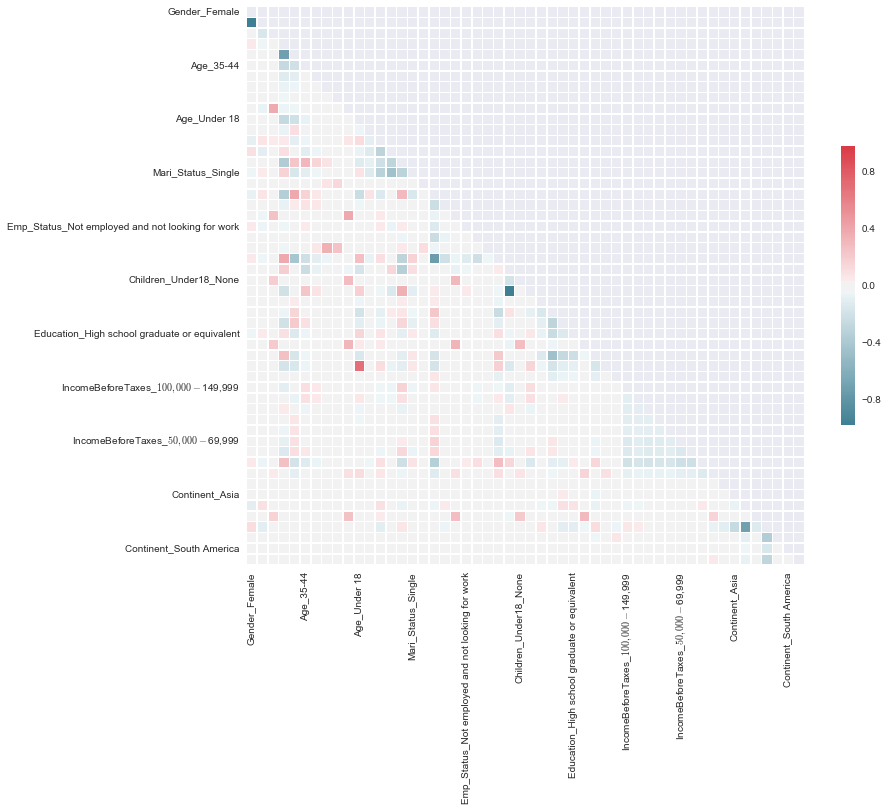

In [94]:

#plot the variables to understand which variables are highly collinear
import seaborn as sns 

#calculate the corelation matrix 
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(13, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,square=True, 
            xticklabels=5, yticklabels=5,linewidths=.5, 
            cbar_kws={"shrink": .5}, ax=ax)

In [95]:
df.columns

Index([u'Gender_Female', u'Gender_Male', u'Gender_None', u'Age_18-24',
       u'Age_25-34', u'Age_35-44', u'Age_45-54', u'Age_55-64',
       u'Age_65 or Above', u'Age_None', u'Age_Under 18',
       u'Mari_Status_Engaged', u'Mari_Status_Forever Alone',
       u'Mari_Status_In a relationship',
       u'Mari_Status_Married/civil union/domestic partnership',
       u'Mari_Status_Single', u'Mari_Status_Widowed',
       u'Emp_Status_Employed full time', u'Emp_Status_Freelance',
       u'Emp_Status_None', u'Emp_Status_Not employed and not looking for work',
       u'Emp_Status_Not employed, but looking for work', u'Emp_Status_Retired',
       u'Emp_Status_Student', u'Children_Under18_No', u'Children_Under18_None',
       u'Children_Under18_Yes', u'Education_Associate degree',
       u'Education_Bachelor's degree',
       u'Education_Graduate or professional degree',
       u'Education_High school graduate or equivalent', u'Education_None',
       u'Education_Some college', u'Education_Some hi

In [96]:
model = RandomForestRegressor(100, oob_score=True, n_jobs=-1, random_state=42)
#model.fit(X_train, y_train)
model.fit(df,y)

C:\Users\Roopa\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=-1, oob_score=True, random_state=42,
           verbose=0, warm_start=False)

In [98]:
from sklearn.metrics import roc_auc_score
roc = roc_auc_score(y, model.oob_prediction_)
print "C-stat: ", roc_auc_score(y, model.oob_prediction_)

C-stat:  0.643365136197


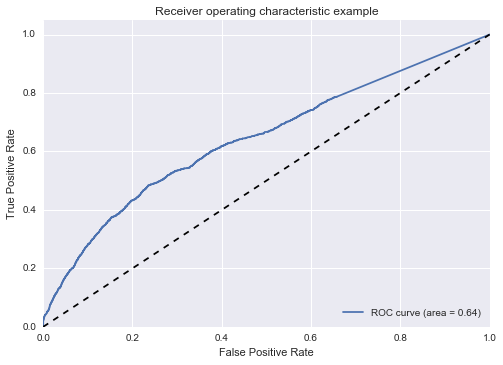

In [99]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve

#fpr, tpr, thresholds = roc_curve(y_test, model.predict(X_test))

fpr, tpr, thresholds= roc_curve(y, model.oob_prediction_)
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

C:\Users\Roopa\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  app.launch_new_instance()


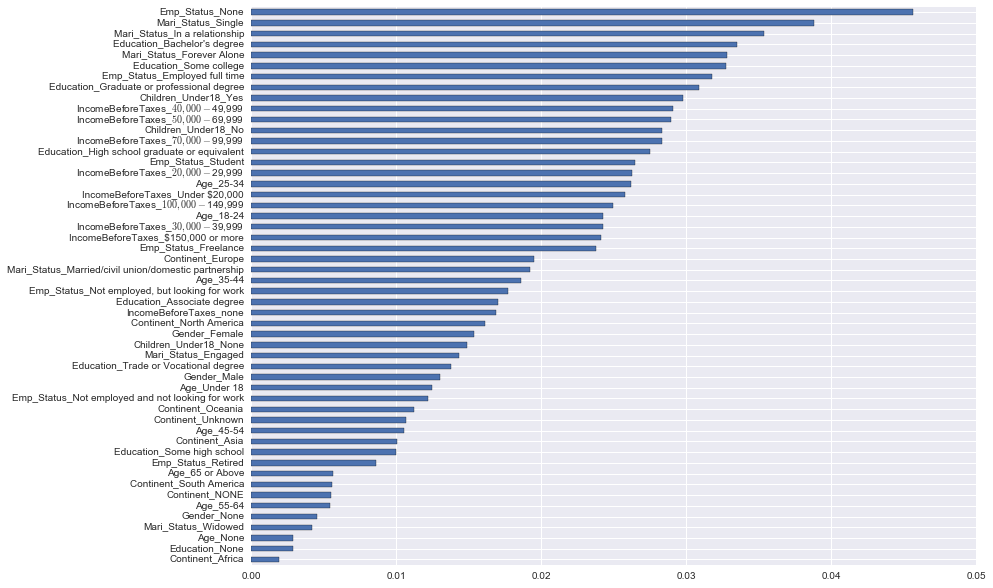

In [100]:
# Simple version that shows all of the variables
feature_importances = pd.Series(model.feature_importances_, index=df.columns)
feature_importances.sort()
feature_importances.plot(kind="barh", figsize=(13,10));

C:\Users\Roopa\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


30 trees
C-stat:  0.632164327724



C:\Users\Roopa\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


50 trees
C-stat:  0.639117236373



C:\Users\Roopa\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


100 trees
C-stat:  0.643365136197



C:\Users\Roopa\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


200 trees
C-stat:  0.645658079163



C:\Users\Roopa\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


500 trees
C-stat:  0.648556119752



C:\Users\Roopa\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


1000 trees
C-stat:  0.649125658506



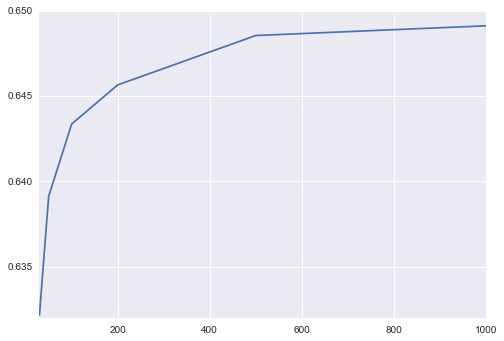

In [101]:
#Different Estimator values
results = []
n_estimator_options = [30, 50, 100, 200, 500, 1000]

for trees in n_estimator_options:
    model = RandomForestRegressor(trees, oob_score=True, n_jobs=-1, random_state=42)
    model.fit(df, y)
    print trees, "trees"
    roc = roc_auc_score(y, model.oob_prediction_)
    print "C-stat: ", roc
    results.append(roc)
    print ""
    
pd.Series(results, n_estimator_options).plot();

C:\Users\Roopa\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


auto option
C-stat:  0.649125658506



C:\Users\Roopa\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


None option
C-stat:  0.649125658506



C:\Users\Roopa\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


sqrt option
C-stat:  0.652186012888



C:\Users\Roopa\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


log2 option
C-stat:  0.652828761948



C:\Users\Roopa\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.9 option
C-stat:  0.650247811287



C:\Users\Roopa\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.2 option
C-stat:  0.653996685907



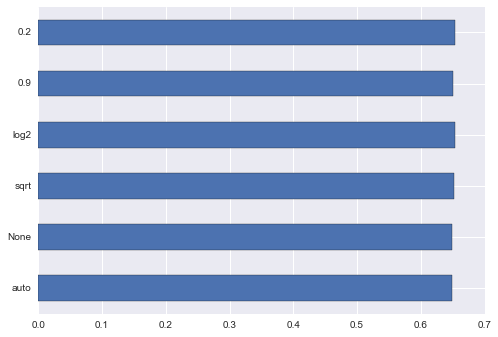

In [102]:
#max_features
results = []
max_features_options = ["auto", None, "sqrt", "log2", 0.9, 0.2]

for max_features in max_features_options:
    model = RandomForestRegressor(n_estimators=1000, oob_score=True, n_jobs=-1, random_state=42, max_features=max_features)
    model.fit(df, y)
    print max_features, "option"
    roc = roc_auc_score(y, model.oob_prediction_)
    print "C-stat: ", roc
    results.append(roc)
    print ""
    
pd.Series(results, max_features_options).plot(kind="barh");

C:\Users\Roopa\Anaconda2\lib\site-packages\ipykernel\__main__.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


1 min samples
C-stat:  0.653996685907



C:\Users\Roopa\Anaconda2\lib\site-packages\ipykernel\__main__.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


2 min samples
C-stat:  0.688506569873



C:\Users\Roopa\Anaconda2\lib\site-packages\ipykernel\__main__.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


4 min samples
C-stat:  0.70249331197



C:\Users\Roopa\Anaconda2\lib\site-packages\ipykernel\__main__.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


6 min samples
C-stat:  0.707628768868



C:\Users\Roopa\Anaconda2\lib\site-packages\ipykernel\__main__.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


8 min samples
C-stat:  0.710765862918



C:\Users\Roopa\Anaconda2\lib\site-packages\ipykernel\__main__.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


10 min samples
C-stat:  0.712722610246



C:\Users\Roopa\Anaconda2\lib\site-packages\ipykernel\__main__.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


50 min samples
C-stat:  0.719830906591



C:\Users\Roopa\Anaconda2\lib\site-packages\ipykernel\__main__.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


100 min samples
C-stat:  0.714400840103



C:\Users\Roopa\Anaconda2\lib\site-packages\ipykernel\__main__.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


150 min samples
C-stat:  0.707168905579



C:\Users\Roopa\Anaconda2\lib\site-packages\ipykernel\__main__.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


200 min samples
C-stat:  0.70438587502



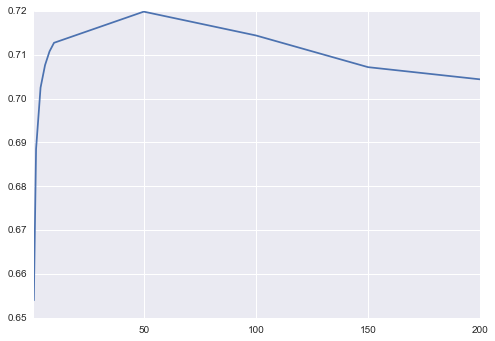

In [103]:
results = []
min_samples_leaf_options = [1,2,4,6,8,10,50,100,150,200]

for min_samples in min_samples_leaf_options:
    model = RandomForestRegressor(n_estimators=1000, 
                                  oob_score=True, 
                                  n_jobs=-1, 
                                  random_state=42, 
                                  max_features=0.2, 
                                  min_samples_leaf=min_samples)
    model.fit(df, y)
    print min_samples, "min samples"
    roc = roc_auc_score(y, model.oob_prediction_)
    print "C-stat: ", roc
    results.append(roc)
    print ""
    
pd.Series(results, min_samples_leaf_options).plot();

In [104]:
#Final Model
model = RandomForestRegressor(n_estimators=1000, 
                              oob_score=True, 
                              n_jobs=-1, 
                              random_state=42, 
                              max_features=0.2, 
                              min_samples_leaf=50)
model.fit(df, y)
roc = roc_auc_score(y, model.oob_prediction_)
print "C-stat: ", roc

C:\Users\Roopa\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


C-stat:  0.719830906591


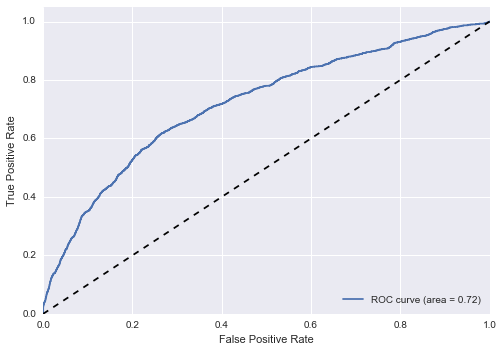

In [105]:
#Lets plot model score to understand the area under the curve
fpr, tpr, thresholds= roc_curve(y, model.oob_prediction_)
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()